<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/Data_Camp_Case_Study_UN_voting_Exploratory_Data_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary:

Import libraries
Import dataset

1) Filtering, mutate

Mutating with countrycode library

2) Grouping and summarizing

Summarizing Full dataset
Summarizing by year
Sorting the summarized dataframe

3) Visualizing

Trend by year
Only UK
Multiple countries

4) What happened to US voting through time?

Linear regression on the United States
Tiding with broom
Linear regression on UK and comparing with US

5) Nesting a dataframe with tidyr package

Unnesting
map() fit a linear model for each nested tibble.
Unnest after tiding all linear models BY COUNTRY

6) Filtering slope model terms

Filtering for significant countries (adjusting p-values because of problem of multiple hypothesis testing)
Sorting by slope

7) Join dataset with descriptions of votings

Visualizing colonialism votes of country US

8) Tidy data with gather(tidyr): Undoing dummy variables

Using gather() from tidyr package
remapping: using recode()

9) Nesting by topic and country

Filter significant p-values
Vanuatu


# Import libraries

In [32]:
# Load  
library(dplyr)
library(ggplot2)
library(broom) # For tiding lms
library(tidyr)
library(purrr) # For the use of map function

# Import dataset

In [2]:
download.file("https://assets.datacamp.com/production/repositories/420/datasets/ddfa750d993c73026f621376f3c187f276bf0e2a/votes.rds", destfile="votes.rds")

In [3]:
votes = readRDS("/content/votes.rds")
head(votes,4)

rcid,session,vote,ccode
<dbl>,<dbl>,<dbl>,<int>
46,2,1,2
46,2,1,20
46,2,9,31
46,2,1,40


Filtering rows
The vote column in the dataset has a number that represents that country's vote:

1 = Yes
2 = Abstain
3 = No
8 = Not present
9 = Not a member

# 1) Filtering, mutate

We first want to remove "Not present" and "Not a member".

In [4]:
# Filter for votes that are "yes", "abstain", or "no"
votes %>%
  filter(vote <= 3)

rcid,session,vote,ccode
<dbl>,<dbl>,<dbl>,<int>
46,2,1,2
46,2,1,20
46,2,1,40
46,2,1,41
46,2,1,42
46,2,1,70
46,2,1,90
46,2,1,91
46,2,1,92


In [5]:
# Add another %>% step to add a year column
votes %>%
  filter(vote <= 3) %>%
  mutate(year = session + 1945)

rcid,session,vote,ccode,year
<dbl>,<dbl>,<dbl>,<int>,<dbl>
46,2,1,2,1947
46,2,1,20,1947
46,2,1,40,1947
46,2,1,41,1947
46,2,1,42,1947
46,2,1,70,1947
46,2,1,90,1947
46,2,1,91,1947
46,2,1,92,1947


## Mutating with countrycode library

In [6]:
install.packages("countrycode")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
# Load the countrycode package
library(countrycode)

In [8]:
# Add a country column within the mutate: votes_processed
votes_processed <- votes %>%
  filter(vote <= 3) %>%
  mutate(year = session + 1945,
         country = countrycode(ccode, "cown", "country.name"))

Warning message in countrycode(ccode, "cown", "country.name"):
“Some values were not matched unambiguously: 260
”


# 2) Grouping and summarizing


## Summarizing Full dataset

In [9]:
# Find total and fraction of "yes" votes
votes_processed %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

total,percent_yes
<int>,<dbl>
353547,0.7999248


## Summarizing by year

In [10]:
# Change this code to summarize by year
by_year <- votes_processed %>%
  group_by(year) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

In [11]:
# Summarize by country: by_country
by_country <- votes_processed %>%
  group_by(country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

head(by_country)

country,total,percent_yes
<chr>,<int>,<dbl>
Afghanistan,2373,0.8592499
Albania,1695,0.7174041
Algeria,2213,0.8992318
Andorra,719,0.6383866
Angola,1431,0.9238295
Antigua & Barbuda,1302,0.9124424


## Sorting the summarized dataframe

In [ ]:
# Sort in descending order
by_country %>%
  arrange(desc(percent_yes)) %>%
  head()

# Sort in ascending order
by_country %>%
  arrange(percent_yes) %>%
  head()

country,total,percent_yes
<chr>,<int>,<dbl>
São Tomé & Príncipe,1091,0.9761687
Seychelles,881,0.9750284
Djibouti,1598,0.9612015
Guinea-Bissau,1538,0.9603381
Timor-Leste,326,0.9570552
Mauritius,1831,0.9497542


country,total,percent_yes
<chr>,<int>,<dbl>
Zanzibar,2,0.0000000
United States,2568,0.2694704
Palau,369,0.3387534
Israel,2380,0.3407563
NA,1075,0.3972093
United Kingdom,2558,0.4167318


There are countries with few votes so we can't make conclusions on those countries.

In [12]:
# Filter out countries with fewer than 100 votes
by_country <- by_country %>%
  arrange(percent_yes) %>%
  filter(total >= 100)
  

# 3) Visualizing

## Trend by year

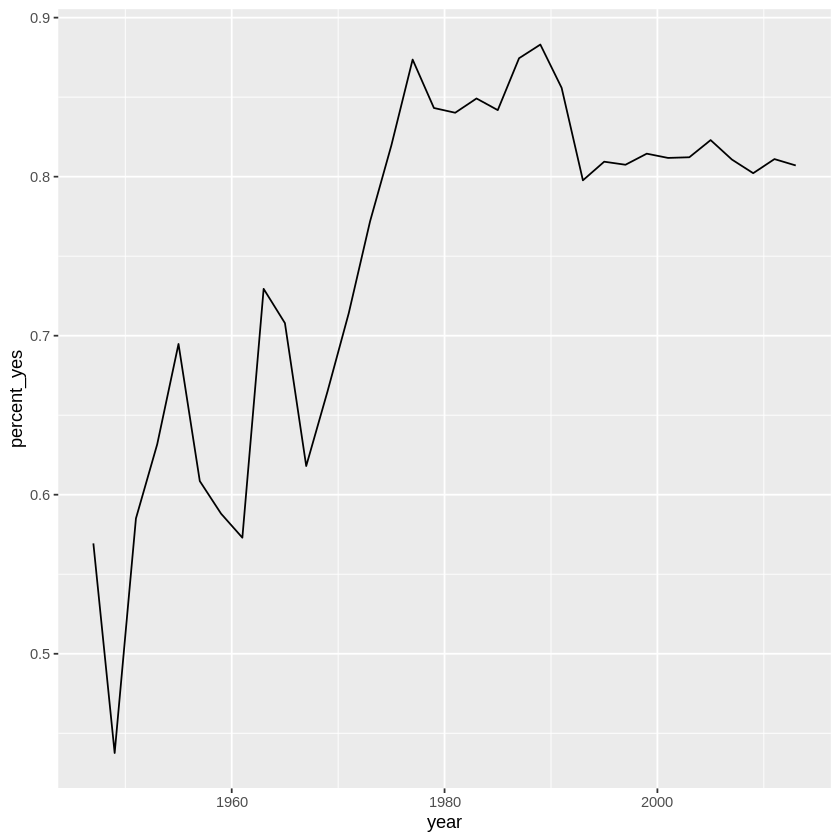

In [13]:
# Create line plot
ggplot(by_year, aes(year, percent_yes)) +
  geom_line()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



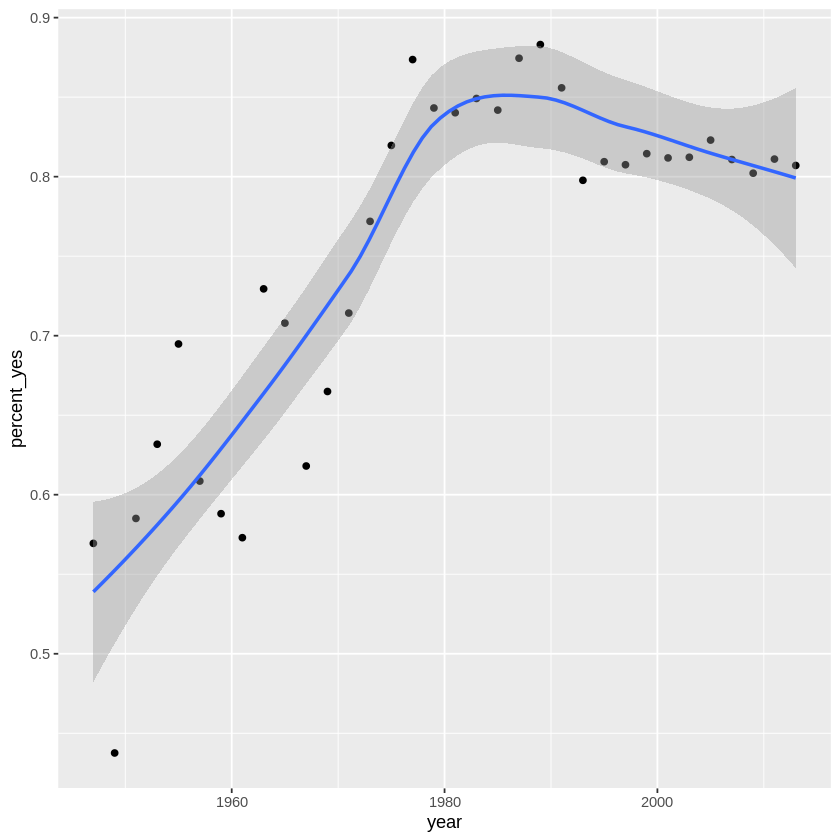

In [ ]:
# Change to scatter plot and add smoothing curve
ggplot(by_year, aes(year, percent_yes)) +
  geom_point() +
  geom_smooth()

## Only UK

In [14]:
# Group by year and country: by_year_country
by_year_country <- votes_processed %>%
  group_by(year, country) %>%
  summarize(total = n(),
            percent_yes = mean(vote == 1))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



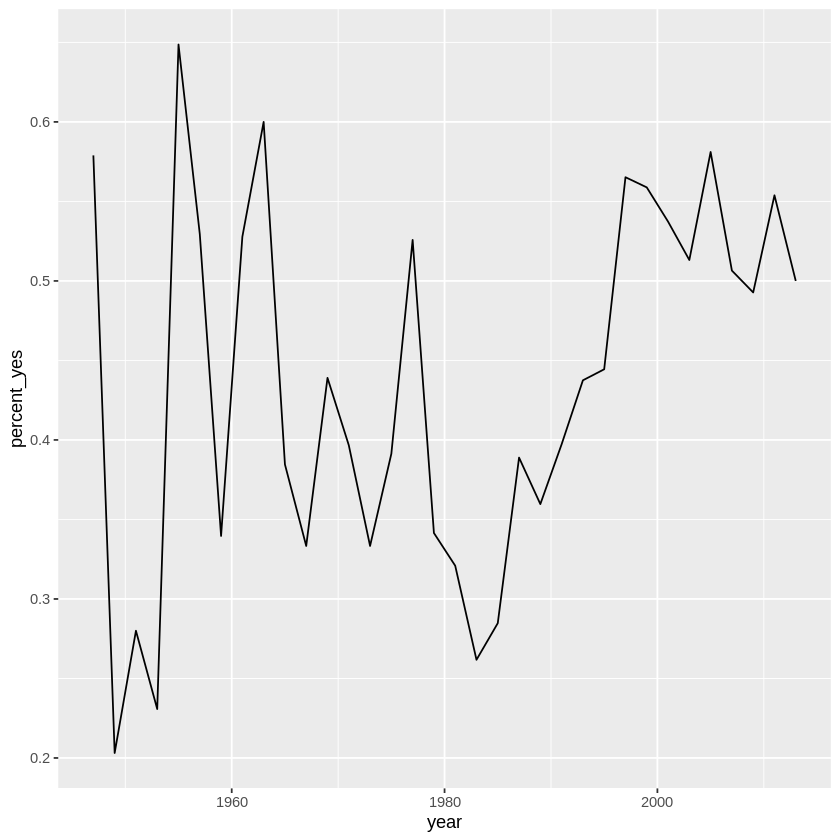

In [15]:
# Create a filtered version: UK_by_year
UK_by_year <- by_year_country %>%
  filter(country == "United Kingdom")

# Line plot of percent_yes over time for UK only
ggplot(UK_by_year, aes(year, percent_yes)) +
  geom_line()

## Multiple countries

Filtering with %in% c(stuff here)

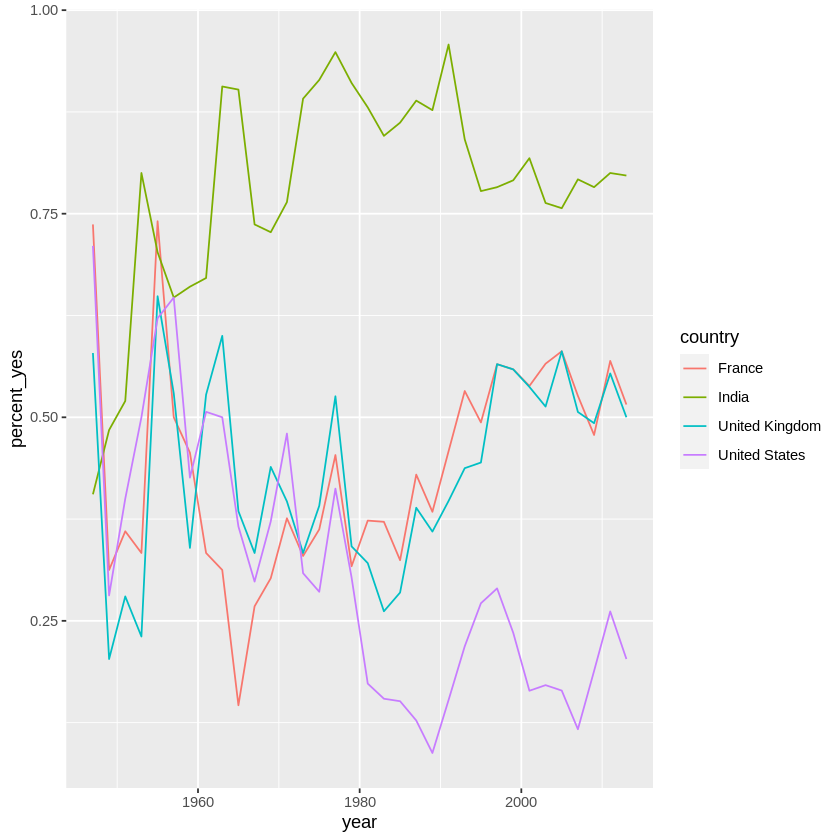

In [16]:
# Vector of four countries to examine
countries <- c("United States", "United Kingdom",
               "France", "India")

# Filter by_year_country: filtered_4_countries
filtered_4_countries <- by_year_country %>%
  filter(country %in% countries)

# Line plot of % yes in four countries
ggplot(filtered_4_countries, aes(year, percent_yes, color = country)) +
  geom_line()

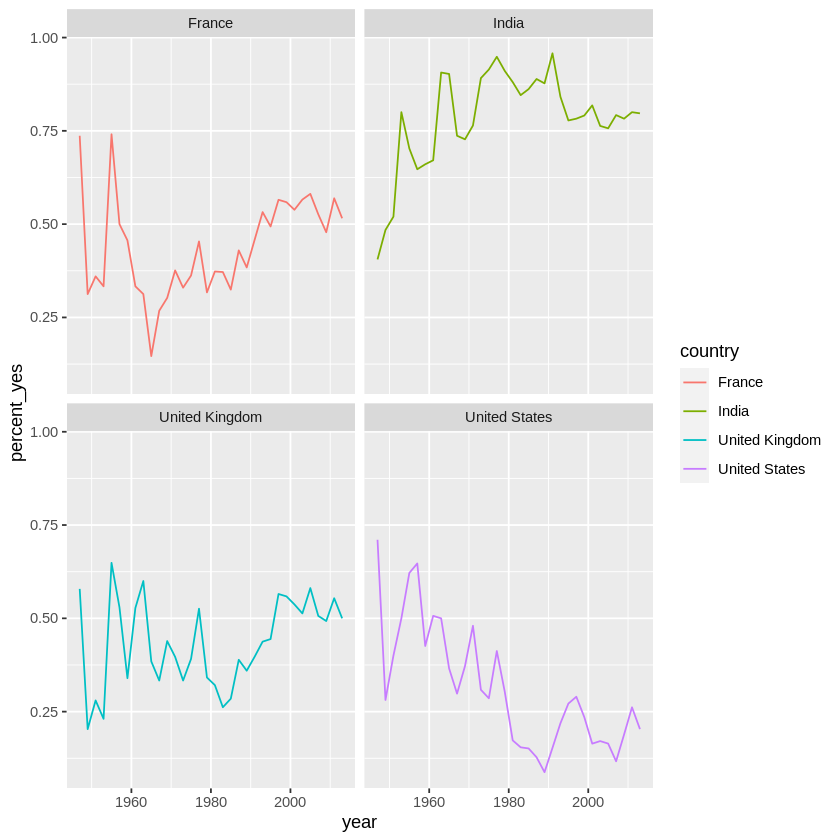

In [17]:
# Line plot of % yes in four countries
ggplot(filtered_4_countries, aes(year, percent_yes, color = country)) +
  geom_line() +  
  facet_wrap(~country)

# 4) What happened to US voting through time?

## Linear regression on the United States

In [19]:
# Percentage of yes votes from the US by year: US_by_year
US_by_year <- by_year_country %>%
  filter(country == "United States")

# Print the US_by_year data
US_by_year

# Perform a linear regression of percent_yes by year: US_fit
US_fit <- lm(percent_yes ~ year, US_by_year)

# Perform summary() on the US_fit object
summary(US_fit)

year,country,total,percent_yes
<dbl>,<chr>,<int>,<dbl>
1947,United States,38,0.7105263
1949,United States,64,0.2812500
1951,United States,25,0.4000000
1953,United States,26,0.5000000
1955,United States,37,0.6216216
1957,United States,34,0.6470588
1959,United States,54,0.4259259
1961,United States,75,0.5066667
1963,United States,32,0.5000000



Call:
lm(formula = percent_yes ~ year, data = US_by_year)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.222491 -0.080635 -0.008661  0.081948  0.194307 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.6641455  1.8379743   6.890 8.48e-08 ***
year        -0.0062393  0.0009282  -6.722 1.37e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1062 on 32 degrees of freedom
Multiple R-squared:  0.5854,	Adjusted R-squared:  0.5724 
F-statistic: 45.18 on 1 and 32 DF,  p-value: 1.367e-07


## Tiding with broom

In [23]:
US_tidied <- tidy(US_fit)
US_tidied

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),12.664145512,1.8379742715,6.890274,8.477089e-08
year,-0.006239305,0.0009282243,-6.721764,1.366904e-07


## Linear regression on UK and comparing with US

In [24]:
# Fit model for the United Kingdom
UK_by_year <- by_year_country %>%
  filter(country == "United Kingdom")

UK_fit <- lm(percent_yes ~ year, UK_by_year)

# UK tidy
UK_tidied <- tidy(UK_fit)

# Combine the two tidied models
bind_rows(US_tidied, UK_tidied)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),12.664145512,1.8379742715,6.890274,8.477089e-08
year,-0.006239305,0.0009282243,-6.721764,1.366904e-07
(Intercept),-3.266547873,1.9577739504,-1.668501,1.049736e-01
year,0.001869434,0.0009887262,1.890750,6.774177e-02


# 5) Nesting a dataframe with tidyr package

In [27]:
# Nest all columns besides country
by_year_country %>%
  nest(-country) %>%
  head(2)

Warning message:
“All elements of `...` must be named.
Did you want `data = c(year, total, percent_yes)`?”


country,data
<chr>,<list>
Afghanistan,"1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 34.0000000, 51.0000000, 25.0000000, 26.0000000, 37.0000000, 34.0000000, 54.0000000, 76.0000000, 32.0000000, 40.0000000, 57.0000000, 42.0000000, 122.0000000, 92.0000000, 68.0000000, 95.0000000, 114.0000000, 125.0000000, 146.0000000, 148.0000000, 140.0000000, 114.0000000, 67.0000000, 55.0000000, 70.0000000, 59.0000000, 26.0000000, 38.0000000, 59.0000000, 66.0000000, 74.0000000, 63.0000000, 64.0000000, 60.0000000, 0.3823529, 0.6078431, 0.7600000, 0.7692308, 0.7297297, 0.5294118, 0.6111111, 0.6052632, 0.7812500, 0.8500000, 0.7368421, 0.8333333, 0.7786885, 0.8478261, 0.9117647, 0.9578947, 0.8771930, 0.8400000, 0.8698630, 0.8783784, 0.9571429, 0.9473684, 0.9701493, 0.9454545, 0.9000000, 0.9322034, 0.8461538, 0.9473684, 0.9661017, 0.9545455, 0.9729730, 0.9682540, 0.9687500, 0.9666667"
Argentina,"1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 38.0000000, 62.0000000, 24.0000000, 26.0000000, 37.0000000, 34.0000000, 54.0000000, 76.0000000, 32.0000000, 41.0000000, 57.0000000, 42.0000000, 124.0000000, 93.0000000, 65.0000000, 94.0000000, 121.0000000, 133.0000000, 144.0000000, 152.0000000, 145.0000000, 114.0000000, 73.0000000, 64.0000000, 80.0000000, 69.0000000, 68.0000000, 67.0000000, 76.0000000, 74.0000000, 77.0000000, 68.0000000, 65.0000000, 64.0000000, 0.5789474, 0.3709677, 0.4583333, 0.6153846, 0.6756757, 0.5588235, 0.6111111, 0.4736842, 0.8125000, 0.6341463, 0.5964912, 0.6428571, 0.5645161, 0.8494624, 0.8307692, 0.8829787, 0.8925620, 0.8421053, 0.8680556, 0.9144737, 0.9172414, 0.9298246, 0.6027397, 0.6406250, 0.5625000, 0.7681159, 0.7500000, 0.7611940, 0.7763158, 0.8648649, 0.8831169, 0.8970588, 0.9076923, 0.8906250"


In [ ]:
# All countries are nested besides country
nested <- by_year_country %>%
  nest(-country)


## Unnesting

Unnesting
The opposite of the nest() operation is the unnest() operation. This takes each of the data frames in the list column and brings those rows back to the main data frame.

In [29]:
# Unnest the data column to return it to its original form
nested %>%
  unnest(data) %>%
  head(2)

country,year,total,percent_yes
<chr>,<dbl>,<int>,<dbl>
Afghanistan,1947,34,0.3823529
Afghanistan,1949,51,0.6078431


## map() fit a linear model for each nested tibble.

The map() function from purrr works by applying a formula to each item in a list, where . represents the individual item. For example, you could add one to each of a list of numbers:

map(numbers, ~ 1 + .)

This means that to fit a model to each dataset, you can do:

map(data, ~ lm(percent_yes ~ year, data = .))

In [35]:
# Add another mutate that applies tidy() to each model
by_year_country %>%
  nest(-country) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
         tidied = map(model, tidy)) %>%
  head(1)

Warning message:
“All elements of `...` must be named.
Did you want `data = c(year, total, percent_yes)`?”


country,data,model,tidied
<chr>,<list>,<list>,<list>
Afghanistan,"1947.0000000, 1949.0000000, 1951.0000000, 1953.0000000, 1955.0000000, 1957.0000000, 1959.0000000, 1961.0000000, 1963.0000000, 1965.0000000, 1967.0000000, 1969.0000000, 1971.0000000, 1973.0000000, 1975.0000000, 1977.0000000, 1979.0000000, 1981.0000000, 1983.0000000, 1985.0000000, 1987.0000000, 1989.0000000, 1991.0000000, 1993.0000000, 1995.0000000, 1997.0000000, 1999.0000000, 2001.0000000, 2003.0000000, 2005.0000000, 2007.0000000, 2009.0000000, 2011.0000000, 2013.0000000, 34.0000000, 51.0000000, 25.0000000, 26.0000000, 37.0000000, 34.0000000, 54.0000000, 76.0000000, 32.0000000, 40.0000000, 57.0000000, 42.0000000, 122.0000000, 92.0000000, 68.0000000, 95.0000000, 114.0000000, 125.0000000, 146.0000000, 148.0000000, 140.0000000, 114.0000000, 67.0000000, 55.0000000, 70.0000000, 59.0000000, 26.0000000, 38.0000000, 59.0000000, 66.0000000, 74.0000000, 63.0000000, 64.0000000, 60.0000000, 0.3823529, 0.6078431, 0.7600000, 0.7692308, 0.7297297, 0.5294118, 0.6111111, 0.6052632, 0.7812500, 0.8500000, 0.7368421, 0.8333333, 0.7786885, 0.8478261, 0.9117647, 0.9578947, 0.8771930, 0.8400000, 0.8698630, 0.8783784, 0.9571429, 0.9473684, 0.9701493, 0.9454545, 0.9000000, 0.9322034, 0.8461538, 0.9473684, 0.9661017, 0.9545455, 0.9729730, 0.9682540, 0.9687500, 0.9666667","-11.06308, 0.006009299, -0.2546669, -0.04119531, 0.09894296, 0.09615513, 0.04463549, -0.1677011, -0.09802032, -0.1158869, 0.04808137, 0.1048128, -0.02036372, 0.06410891, -0.002554492, 0.05456447, 0.1064845, 0.1405959, 0.04787558, -0.001336004, 0.01650841, 0.01300518, 0.07975106, 0.05795803, 0.06872026, 0.03200696, -0.02546618, -0.005281392, -0.1033495, -0.01415356, -0.007438879, -0.03101372, -0.0246048, -0.0413424, -0.05286496, -0.06696689, -4.87075, 0.6875331, 0.1368972, 0.1340537, 0.08247835, -0.1299139, -0.06028883, -0.07821106, 0.0857015, 0.1423772, 0.01714504, 0.101562, 0.0348429, 0.09190618, 0.1437705, 0.1778263, 0.08505024, 0.03578297, 0.05357171, 0.05001279, 0.116703, 0.09485427, 0.1055608, 0.06879184, 0.01126301, 0.03139212, -0.0667317, 0.02240859, 0.02906758, 0.005437062, 0.0117903, -0.005002985, -0.01658123, -0.03073885, 2, 0.6370198, 0.6490384, 0.661057, 0.6730756, 0.6850942, 0.6971128, 0.7091314, 0.72115, 0.7331686, 0.7451872, 0.7572058, 0.7692244, 0.781243, 0.7932616, 0.8052802, 0.8172988, 0.8293174, 0.841336, 0.8533546, 0.8653732, 0.8773918, 0.8894104, 0.901429, 0.9134476, 0.9254662, 0.9374848, 0.9495034, 0.961522, 0.9735406, 0.9855592, 0.9975778, 1.009596, 1.021615, 1.033634, 0, 1, -5.830952, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, 0.1714986, -11545.28, 114.4115, 0.2112466, 0.1937658, 0.1762851, 0.1588043, 0.1413236, 0.1238428, 0.1063621, 0.08888132, 0.07140056, 0.05391981, 0.03643905, 0.0189583, 0.001477544, -0.01600321, -0.03348396, -0.05096472, -0.06844547, -0.08592623, -0.103407, -0.1208877, -0.1383685, -0.1558492, -0.17333, -0.1908108, -0.2082915, -0.2257723, -0.243253, -0.2607338, -0.2782145, -0.2956953, -0.313176, -0.3306568, 1.171499, 1.228727, 1, 2, 1e-07, 2, 32, lm(formula = percent_yes ~ year, data = .), percent_yes ~ year, 0.3823529, 0.6078431, 0.76, 0.7692308, 0.7297297, 0.5294118, 0.6111111, 0.6052632, 0.78125, 0.85, 0.7368421, 0.8333333, 0.7786885, 0.8478261, 0.9117647, 0.9578947, 0.877193, 0.84, 0.869863, 0.8783784, 0.9571429, 0.9473684, 0.9701493, 0.9454545, 0.9, 0.9322034, 0.8461538, 0.9473684, 0.9661017, 0.9545455, 0.972973, 0.968254, 0.96875, 0.9666667, 1947, 1949, 1951, 1953, 1955, 1957, 1959, 1961, 1963, 1965, 1967, 1969, 1971, 1973, 1975, 1977, 1979, 1981, 1983, 1985, 1987, 1989, 1991, 1993, 1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013","(Intercept) , year , -11.

## Unnest after tiding all linear models BY COUNTRY

In [38]:
# Add one more step that unnests the tidied column
country_coefficients <- by_year_country %>%
  nest(-country) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
         tidied = map(model, tidy)) %>%
  unnest(tidied) %>%
  select(-data, -model)

# Print the resulting country_coefficients variable
head(country_coefficients)

Warning message:
“All elements of `...` must be named.
Did you want `data = c(year, total, percent_yes)`?”


country,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,(Intercept),-11.063084650,1.4705189228,-7.523252,1.444892e-08
Afghanistan,year,0.006009299,0.0007426499,8.091698,3.064797e-09
Argentina,(Intercept),-9.464512565,2.1008982371,-4.504984,8.322481e-05
Argentina,year,0.005148829,0.0010610076,4.852773,3.047078e-05
Australia,(Intercept),-4.545492536,2.1479916283,-2.116159,4.220387e-02
Australia,year,0.002567161,0.0010847910,2.366503,2.417617e-02


# 6) Filtering slope model terms

In [40]:
# Filter for only the slope terms
country_coefficients %>%
  filter(term == "year") %>%
  head(2)

country,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,year,0.006009299,0.0007426499,8.091698,3.064797e-09
Argentina,year,0.005148829,0.0010610076,4.852773,3.047078e-05


## Filtering for significant countries (adjusting p-values because of problem of multiple hypothesis testing)

Not all slopes are significant, and you can use the p-value to guess which are and which are not.
However, when you have lots of p-values, like one for each country, you run into the problem of multiple hypothesis testing, where you have to set a stricter threshold. The p.adjust() function is a simple way to correct for this, where p.adjust(p.value) on a vector of p-values returns a set that you can trust.

In [42]:
# Filter for only the slope terms
slope_terms <- country_coefficients %>%
  filter(term == "year")

# Add p.adjusted column, then filter
slope_terms %>%
  mutate(p.adjusted = p.adjust(p.value)) %>%
  filter(p.adjusted < .05) %>%
  dim()

[1] 61  7

## Sorting by slope

In [45]:
# Filter by adjusted p-values
filtered_countries <- country_coefficients %>%
  filter(term == "year") %>%
  mutate(p.adjusted = p.adjust(p.value)) %>%
  filter(p.adjusted < .05)

# Sort for the countries increasing most quickly
filtered_countries %>%
  arrange(desc(estimate))

country,term,estimate,std.error,statistic,p.value,p.adjusted
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
South Africa,year,0.011858333,0.0014003768,8.467959,1.595372e-08,3.047161e-06
Kazakhstan,year,0.010955741,0.0019482401,5.623404,3.244186e-04,4.509419e-02
Yemen Arab Republic,year,0.010854882,0.0015869058,6.840281,1.197855e-06,2.108224e-04
Kyrgyzstan,year,0.009725462,0.0009884060,9.839541,2.379933e-05,3.784094e-03
Malawi,year,0.009084873,0.0018111087,5.016194,4.480823e-05,7.034891e-03
Dominican Republic,year,0.008055482,0.0009138578,8.814809,5.957258e-10,1.173580e-07
Portugal,year,0.008020046,0.0017124482,4.683380,7.132640e-05,1.098426e-02
Honduras,year,0.007717977,0.0009214260,8.376123,1.431724e-09,2.806179e-07
Peru,year,0.007299813,0.0009764019,7.476238,1.645381e-08,3.118220e-06


# 7) Join dataset with descriptions of votings

In [46]:
link_desc <- "https://assets.datacamp.com/production/repositories/420/datasets/a438432333a31a6f4aba2d5507df9a44e513b518/descriptions.rds"
download.file(link_desc, destfile="descriptions.rds")

descriptions = readRDS("/content/descriptions.rds")
head(descriptions,4)

rcid,session,date,unres,me,nu,di,hr,co,ec
<dbl>,<dbl>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,2,1947-09-04,R/2/299,0,0,0,0,0,0
47,2,1947-10-05,R/2/355,0,0,0,1,0,0
48,2,1947-10-06,R/2/461,0,0,0,0,0,0
49,2,1947-10-06,R/2/463,0,0,0,0,0,0


topic of a resolution:

me: Palestinian conflict
nu: Nuclear weapons and nuclear material
di: Arms control and disarmament
hr: Human rights
co: Colonialism
ec: Economic development

In [48]:
# Join them together based on the "rcid" and "session" columns
votes_joined <- votes_processed %>%
  inner_join(descriptions, by = c("rcid", "session"))

head(votes_joined,2)

rcid,session,vote,ccode,year,country,date,unres,me,nu,di,hr,co,ec
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,2,1,2,1947,United States,1947-09-04,R/2/299,0,0,0,0,0,0
46,2,1,20,1947,Canada,1947-09-04,R/2/299,0,0,0,0,0,0


## Visualizing colonialism votes of country US

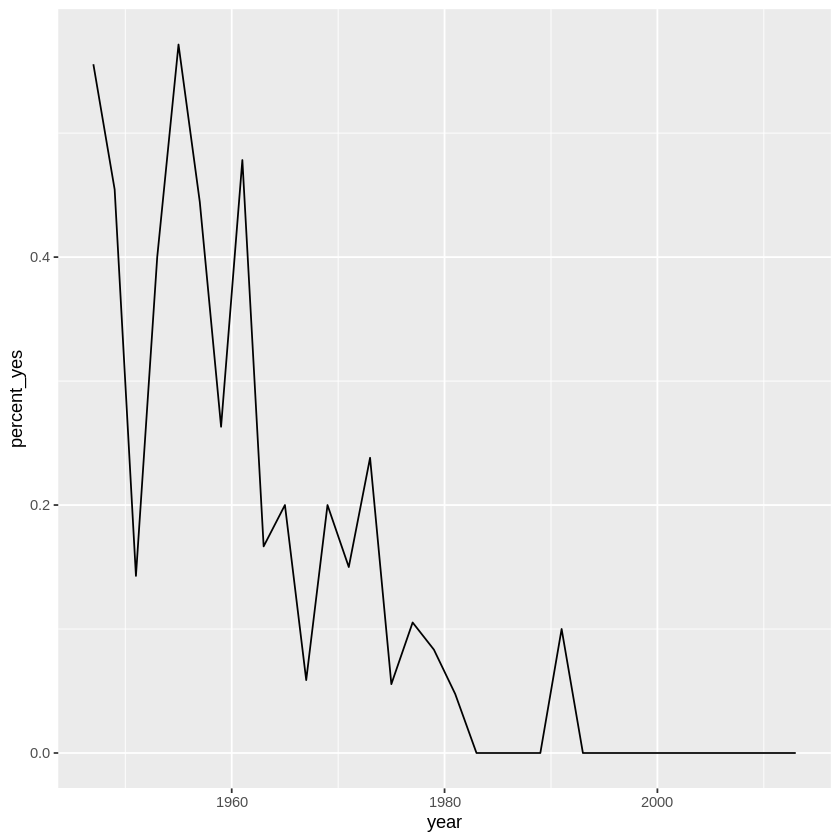

In [55]:
# Filter, then summarize by year: US_co_by_year
US_co_by_year <- votes_joined %>%
  filter(country == "United States", co == 1) %>%
  group_by(year) %>%
  summarize(percent_yes = mean(vote==1))

# Graph the % of "yes" votes over time
ggplot(US_co_by_year, aes(year, percent_yes)) +
  geom_line()

# 8) Tidy data with gather(tidyr): Undoing dummy variables

## Using gather() from tidyr package

In [57]:
# Gather the six me/nu/di/hr/co/ec columns
votes_joined %>%
  gather(topic, has_topic, me:ec) %>%
  head(2)

rcid,session,vote,ccode,year,country,date,unres,topic,has_topic
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dttm>,<chr>,<chr>,<dbl>
46,2,1,2,1947,United States,1947-09-04,R/2/299,me,0
46,2,1,20,1947,Canada,1947-09-04,R/2/299,me,0


In [59]:
# Perform gather again, then filter fot topic==1
votes_gathered <- votes_joined %>%
  gather(topic, has_topic, me:ec) %>%
  filter(has_topic == 1)

head(votes_gathered,2)

rcid,session,vote,ccode,year,country,date,unres,topic,has_topic
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dttm>,<chr>,<chr>,<dbl>
77,2,1,2,1947,United States,1947-11-06,R/2/1424,me,1
77,2,1,20,1947,Canada,1947-11-06,R/2/1424,me,1


## remapping: using recode()

So that you can interpret the data more easily, recode the data to replace these codes with their full name. You can do that with dplyr's recode() function, which replaces values with ones you specify:

example <- c("apple", "banana", "apple", "orange")
recode(example,
       apple = "plum",
       banana = "grape")

In [60]:
# Replace the two-letter codes in topic: votes_tidied
votes_tidied <- votes_gathered %>%
  mutate(topic = recode(topic,
                        me = "Palestinian conflict",
                        nu = "Nuclear weapons and nuclear material",
                        di = "Arms control and disarmament",
                        hr = "Human rights",
                        co = "Colonialism",
                        ec = "Economic development"))

In [62]:
# Summarize the percentage "yes" per country-year-topic
by_country_year_topic <- votes_tidied %>%
  group_by(country, year, topic) %>%
  summarize(total = n(), percent_yes = mean(vote == 1)) %>%
  ungroup()

# Print by_country_year_topic
head(by_country_year_topic,2)

`summarise()` has grouped output by 'country', 'year'. You can override using the `.groups` argument.



country,year,topic,total,percent_yes
<chr>,<dbl>,<chr>,<int>,<dbl>
Afghanistan,1947,Colonialism,8,0.5
Afghanistan,1947,Economic development,1,0.0


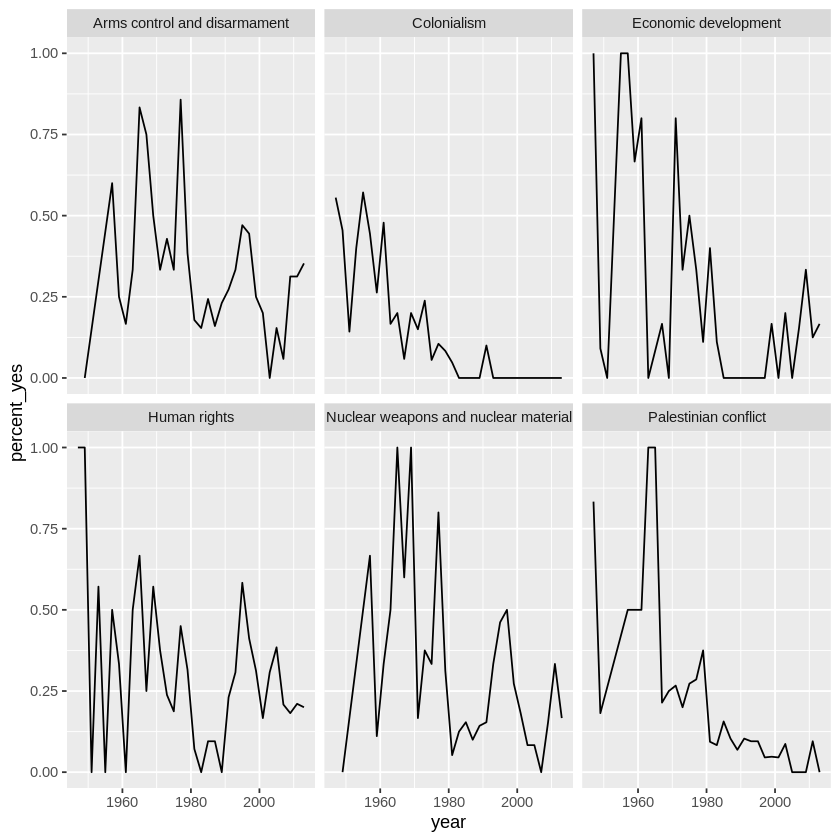

In [63]:
# Filter by_country_year_topic for just the US
US_by_country_year_topic <- by_country_year_topic %>%
  filter(country == "United States")

# Plot % yes over time for the US, faceting by topic
ggplot(US_by_country_year_topic, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~ topic)

# 9) Nesting by topic and country


In [68]:
# Print by_country_year_topic
head(by_country_year_topic,2)

# Fit model on the by_country_year_topic dataset
country_topic_coefficients <- by_country_year_topic %>%
  nest(-country, -topic) %>%
  mutate(model = map(data, ~ lm(percent_yes ~ year, data = .)),
         tidied = map(model, tidy)) %>%
  unnest(tidied) %>%
  select(-model,-data)

# Print country_topic_coefficients
head(country_topic_coefficients,4)

country,year,topic,total,percent_yes
<chr>,<dbl>,<chr>,<int>,<dbl>
Afghanistan,1947,Colonialism,8,0.5
Afghanistan,1947,Economic development,1,0.0


Warning message:
“All elements of `...` must be named.
Did you want `data = c(year, total, percent_yes)`?”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summ

country,topic,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Colonialism,(Intercept),-9.196506325,1.9573746777,-4.698388,4.764816e-05
Afghanistan,Colonialism,year,0.005106200,0.0009885245,5.165476,1.228004e-05
Afghanistan,Economic development,(Intercept),-11.476390441,3.6191205187,-3.171044,3.489103e-03
Afghanistan,Economic development,year,0.006239157,0.0018265400,3.415834,1.845050e-03


## Filter significant p-values

In [70]:
# Create country_topic_filtered
country_topic_filtered <- country_topic_coefficients %>%
  filter(term == "year") %>%
  mutate(p.adjusted = p.adjust(p.value)) %>%
  filter(p.adjusted < .05)

head(country_topic_filtered,2)

country,topic,term,estimate,std.error,statistic,p.value,p.adjusted
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Colonialism,year,0.005106200,0.0009885245,5.165476,1.228004e-05,0.014109769
Austria,Colonialism,year,0.008353305,0.0015203457,5.494346,8.095365e-06,0.009358242


# Vanuatu

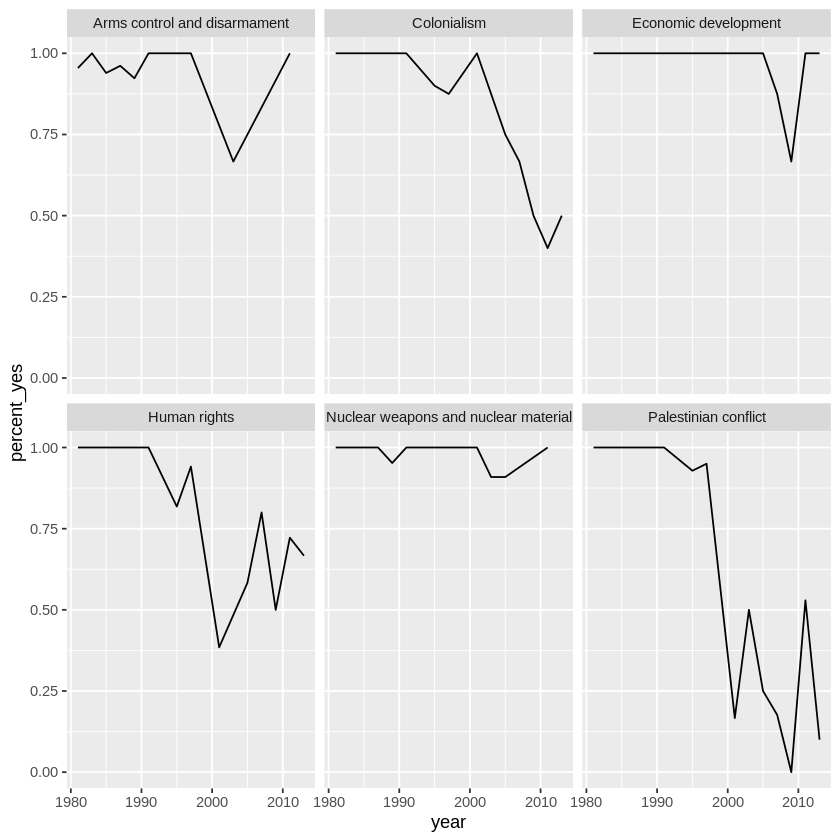

In [71]:
# Create vanuatu_by_country_year_topic
vanuatu_by_country_year_topic <- by_country_year_topic %>%
  filter(country == "Vanuatu")

# Plot of percentage "yes" over time, faceted by topic
ggplot(vanuatu_by_country_year_topic, aes(year, percent_yes)) +
  geom_line() +
  facet_wrap(~ topic)